In [1]:
import pandas as pd


def loadData():
    def toNumber(line):
        l = [float(x.strip()) for x in line]
        l[-1] = int(l[-1])
        return l
    with open('data/square.data', 'r') as fin:
        data = [toNumber(line.split()) for line in fin.readlines()]
        square = pd.DataFrame(data, columns = ['x', 'y', 'label'])
    with open('data/long.data', 'r') as fin:
        data = [toNumber(line.split()) for line in fin.readlines()]
        longData = pd.DataFrame(data, columns = ['x', 'y', 'label'])
    with open('data/2d-10c.dat', 'r') as fin:
        data = [toNumber(line.split()) for line in fin.readlines()[3:]]
        td10c = pd.DataFrame(data, columns = ['x', 'y', 'label'])
    with open('data/smile.csv', 'r') as fin:
        data = [toNumber(line.split(',')) for line in fin.readlines()]
        smile = pd.DataFrame(data, columns = ['x', 'y', 'label'])
    with open('data/order2-3clust.csv', 'r') as fin:
        data = [toNumber(line.split(',')) for line in fin.readlines()]
        o23c = pd.DataFrame(data, columns = ['x', 'y', 'label'])
    with open('data/iris.csv', 'r') as fin:
        data = [toNumber(line.split(',')) for line in fin.readlines()[:-1]]
        iris = pd.DataFrame(data, columns = ['x', 'y', 'w', 'z', 'label'])
    return square, longData, td10c, smile, o23c, iris

square, longData, td10c, smile, o23c, iris = loadData()
datasets = [(square, 'Square'), (longData, 'Long'), (td10c, '2d-10c'), (smile, 'Smile'), (o23c, 'Order2-3clust'), (iris, 'Iris')]

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score


def plotData(data):
    plt.scatter(data.x, data.y, c = data.label, cmap='rainbow')
    plt.show()

def plotDataWithError(data, classified):
    ari = adjusted_rand_score(data.label, classified)
    print("Error %.4lf\tARI: %.4lf:" % ((1 - ari) / 2, ari))
    plt.scatter(data.x, data.y, c = classified, cmap='rainbow')
    plt.show()

Real Clusters
Square


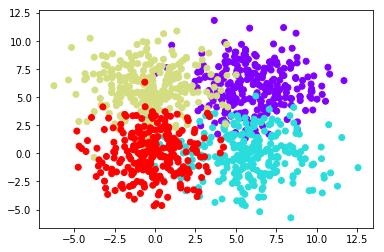

Long


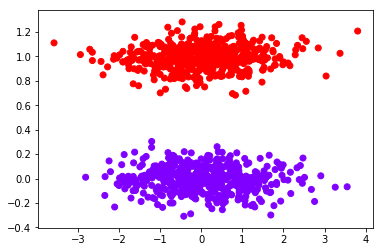

2d-10c


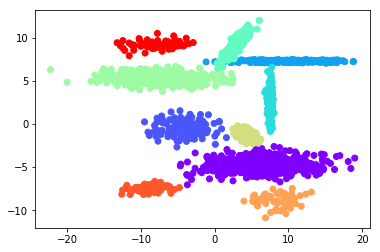

Smile


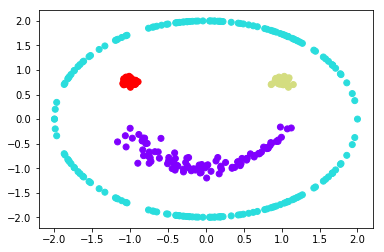

Order2-3clust


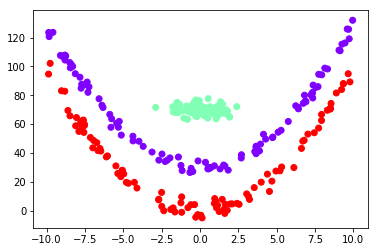

Iris


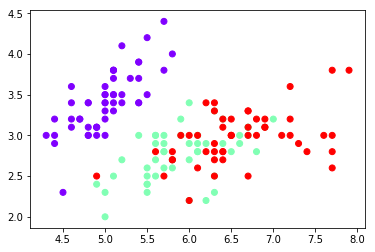

In [35]:
print('Real Clusters')
for data in datasets:
    print(data[1])
    plotData(data[0])

In [27]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.mixture import GaussianMixture


def singleLink(data):
    cluster = AgglomerativeClustering(n_clusters=len(set(data.label)), affinity='euclidean', linkage='single')
    cluster.fit_predict(data[list(data)[:-1]])
    plotDataWithError(data, cluster.labels_)
    
def completeLink(data):
    cluster = AgglomerativeClustering(n_clusters=len(set(data.label)), affinity='euclidean', linkage='complete')
    cluster.fit_predict(data[list(data)[:-1]])
    plotDataWithError(data, cluster.labels_)
    
def averageLink(data):
    cluster = AgglomerativeClustering(n_clusters=len(set(data.label)), affinity='euclidean', linkage='average')
    cluster.fit_predict(data[list(data)[:-1]])
    plotDataWithError(data, cluster.labels_)
    
def wardLink(data):
    cluster = AgglomerativeClustering(n_clusters=len(set(data.label)), affinity='euclidean', linkage='ward')
    cluster.fit_predict(data[list(data)[:-1]])
    plotDataWithError(data, cluster.labels_)

def DBScan(data):
    cluster = DBSCAN(eps=.95, min_samples=10).fit(data[list(data)[:-1]])
    plotDataWithError(data, cluster.labels_)
    
def kMeans(data):
    cluster = KMeans(n_clusters=len(set(data.label))).fit(data[list(data)[:-1]])
    plotDataWithError(data, cluster.labels_)
    
def EMClust(data):
    EMLabels = GaussianMixture(n_components=len(set(data.label))).fit_predict(data[list(data)[:-1]])
    plotDataWithError(data, EMLabels)

Single Link
Square
Error 0.5000	ARI: 0.0000:


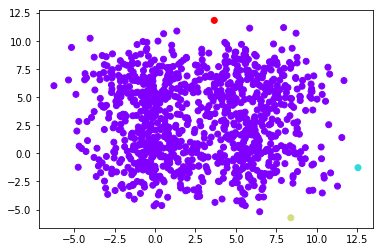

Long
Error 0.5000	ARI: 0.0000:


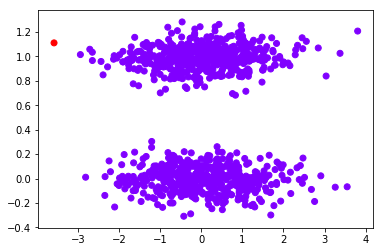

2d-10c
Error 0.3476	ARI: 0.3048:


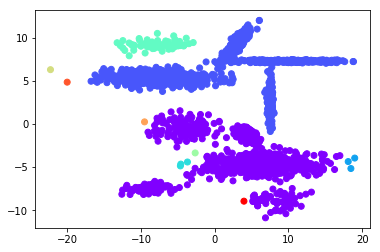

Smile
Error 0.0000	ARI: 1.0000:


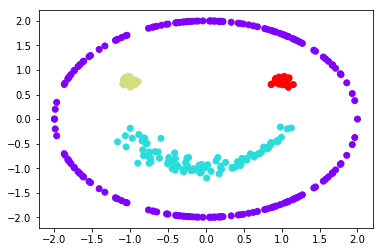

Order2-3clust
Error 0.4980	ARI: 0.0040:


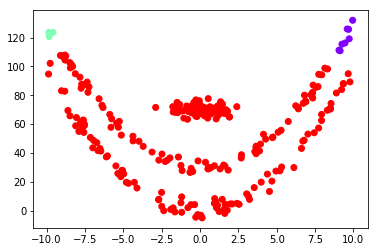

Iris
Error 0.2181	ARI: 0.5638:


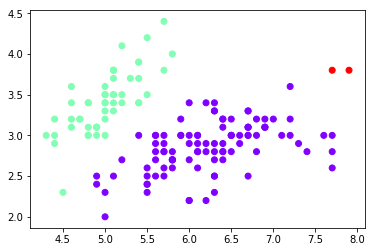

In [37]:
print('Single Link')
for data in datasets:
    print(data[1])
    singleLink(data[0])

Complete Link
Square
Error 0.2248	ARI: 0.5505:


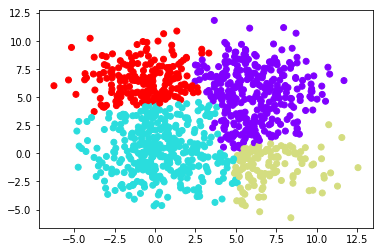

Long
Error 0.4955	ARI: 0.0091:


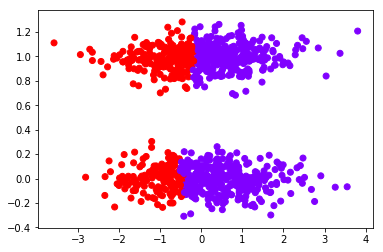

2d-10c
Error 0.2411	ARI: 0.5179:


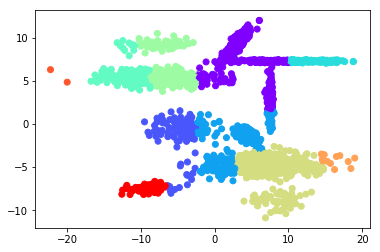

Smile
Error 0.4047	ARI: 0.1906:


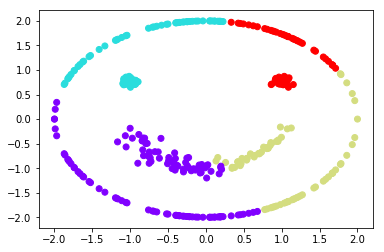

Order2-3clust
Error 0.3538	ARI: 0.2925:


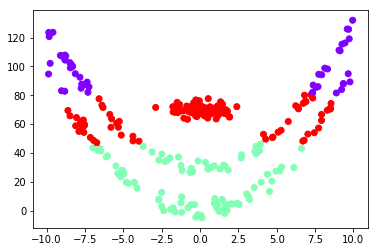

Iris
Error 0.1789	ARI: 0.6423:


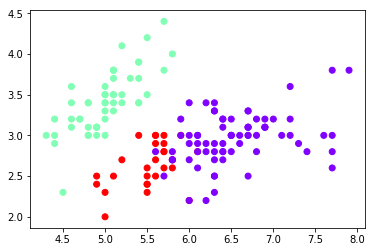

In [38]:
print('Complete Link')
for data in datasets:
    print(data[1])
    completeLink(data[0])

Average Link
Square
Error 0.1981	ARI: 0.6037:


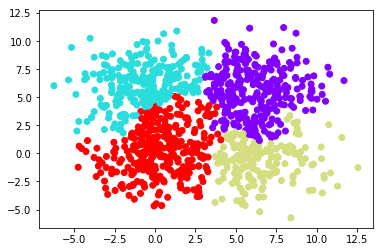

Long
Error 0.5000	ARI: 0.0000:


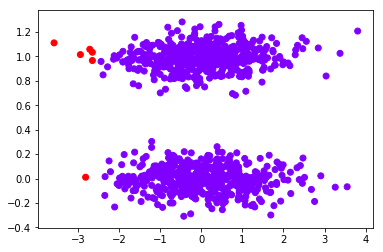

2d-10c
Error 0.1691	ARI: 0.6619:


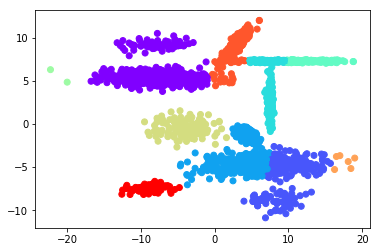

Smile
Error 0.3926	ARI: 0.2148:


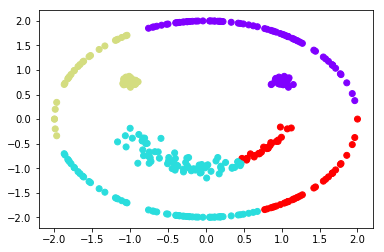

Order2-3clust
Error 0.4105	ARI: 0.1790:


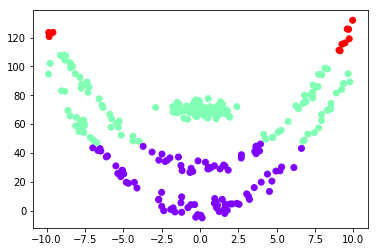

Iris
Error 0.1204	ARI: 0.7592:


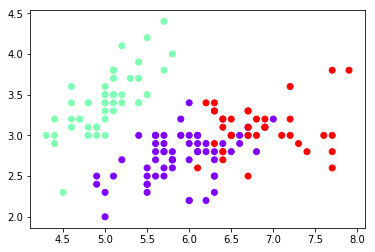

In [39]:
print('Average Link')
for data in datasets:
    print(data[1])
    averageLink(data[0])

Ward Link
Square
Error 0.2384	ARI: 0.5232:


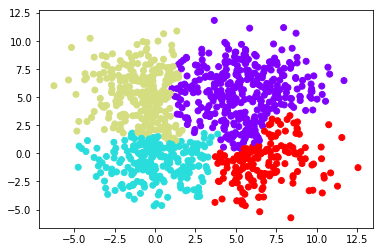

Long
Error 0.4999	ARI: 0.0002:


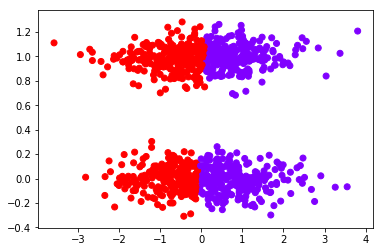

2d-10c
Error 0.1694	ARI: 0.6612:


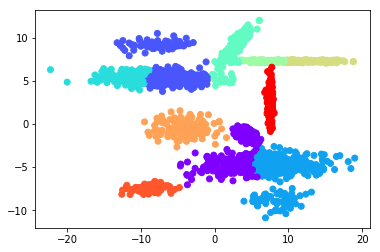

Smile
Error 0.3979	ARI: 0.2041:


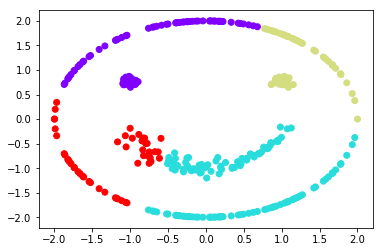

Order2-3clust
Error 0.3436	ARI: 0.3128:


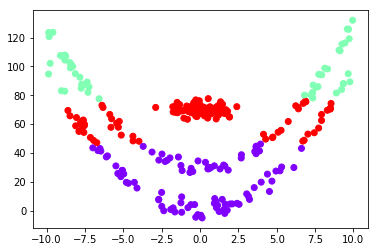

Iris
Error 0.1344	ARI: 0.7312:


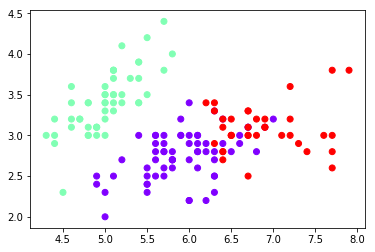

In [40]:
print('Ward Link')
for data in datasets:
    print(data[1])
    wardLink(data[0])

DBSCAN
Square
Error 0.5000	ARI: -0.0001:


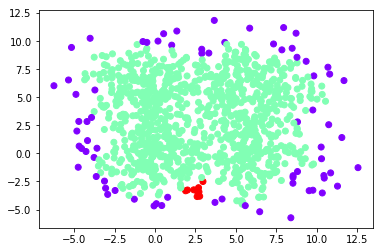

Long
Error 0.5000	ARI: 0.0000:


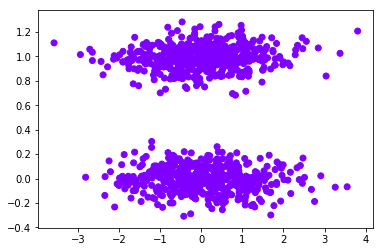

2d-10c
Error 0.2106	ARI: 0.5788:


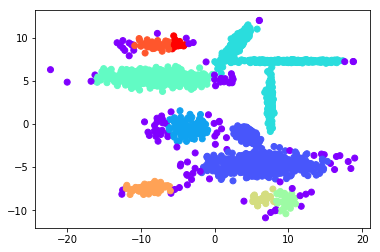

Smile
Error 0.5000	ARI: 0.0000:


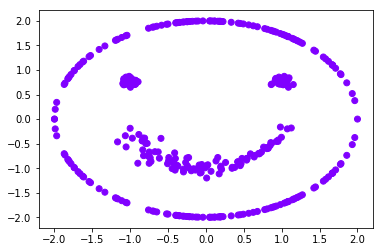

Order2-3clust
Error 0.3685	ARI: 0.2631:


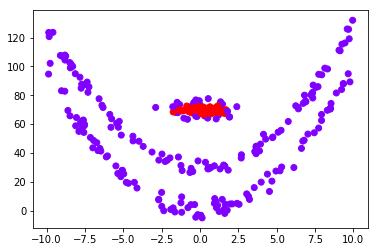

Iris
Error 0.2159	ARI: 0.5681:


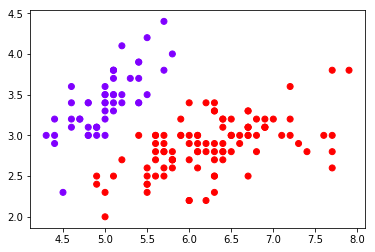

In [28]:
print('DBSCAN')
for data in datasets:
    print(data[1])
    DBScan(data[0])

K-Means
Square
Error 0.1534	ARI: 0.6932:


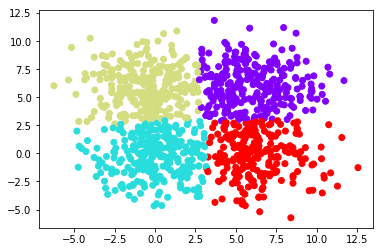

Long
Error 0.5004	ARI: -0.0008:


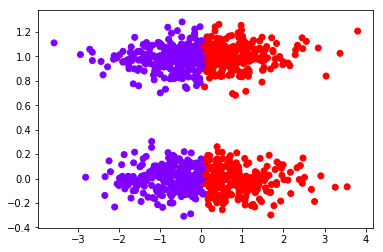

2d-10c
Error 0.1377	ARI: 0.7245:


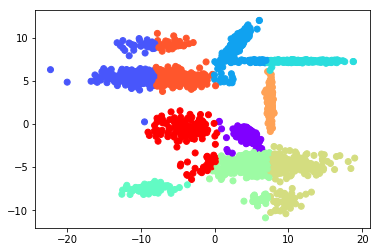

Smile
Error 0.4074	ARI: 0.1852:


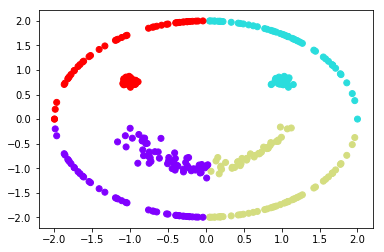

Order2-3clust
Error 0.3789	ARI: 0.2422:


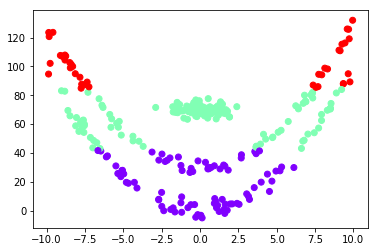

Iris
Error 0.1349	ARI: 0.7302:


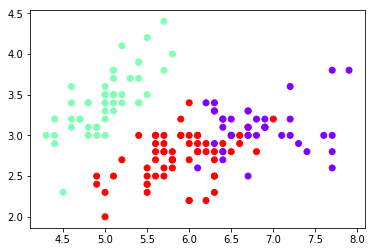

In [42]:
print('K-Means')
for data in datasets:
    print(data[1])
    kMeans(data[0])

EM Algorithm
Square
Error 0.1589	ARI: 0.6822:


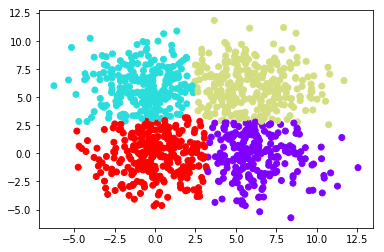

Long
Error 0.4923	ARI: 0.0154:


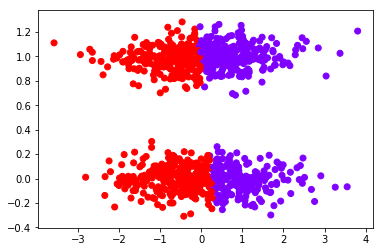

2d-10c
Error 0.0009	ARI: 0.9982:


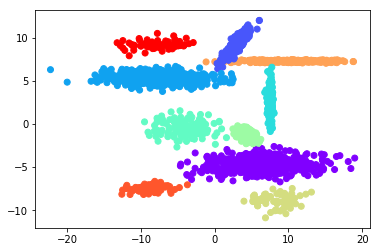

Smile
Error 0.4035	ARI: 0.1929:


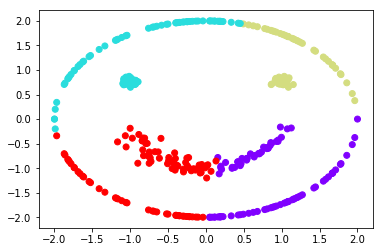

Order2-3clust
Error 0.3096	ARI: 0.3809:


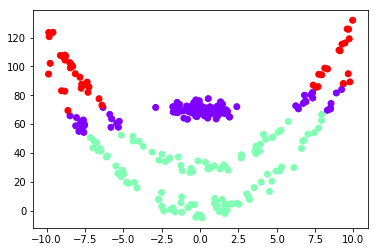

Iris
Error 0.0481	ARI: 0.9039:


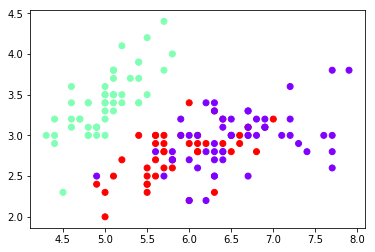

In [43]:
print('EM Algorithm')
for data in datasets:
    print(data[1])
    EMClust(data[0])

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Square	Error 0.2394	ARI: 0.5211:


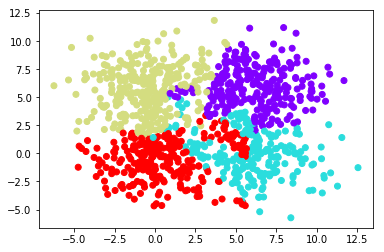

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Long	Error 0.0335	ARI: 0.9331:


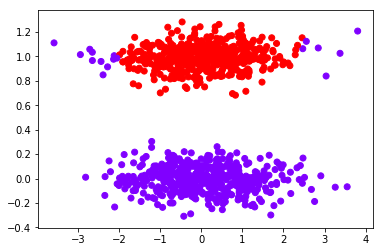

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
2d-10c	Error 0.2739	ARI: 0.4523:


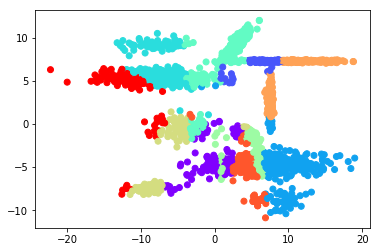

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Smile	Error 0.3744	ARI: 0.2513:


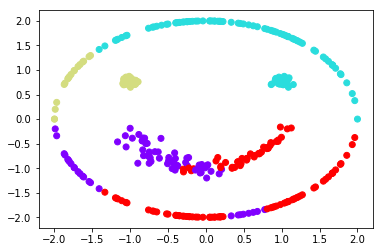

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Order2-3clust	Error 0.2979	ARI: 0.4042:


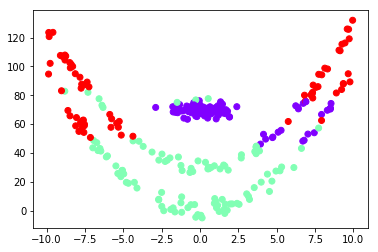

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Iris	Error 0.2710	ARI: 0.4581:


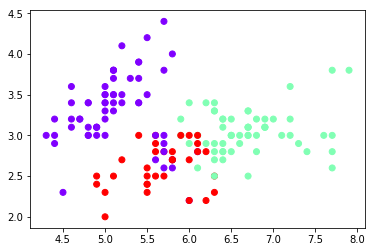

In [8]:
import SimpSOM as sps
import numpy as np


def SOM_clustering(data, grid_shape=(6, 6), lr=0.03, epochs=200):
    data = data.values
    perm = np.random.permutation(len(data))
    raw_data = data[perm, :-1]
    
    net = sps.somNet(*grid_shape, raw_data)
    net.train(lr, epochs)
    total_clusters = len(np.unique(data[:, -1]))
    clusters = net.cluster(
        data[:, :-1], type='KMeans', 
        numcl=total_clusters, show=False, savefile=False
    )
    
    labels = np.zeros(len(data))
    for cidx, cluster in enumerate(clusters):
        for idx in cluster:
            labels[idx] = cidx
    return labels
            

for data, dataset_name in datasets:
    labels = SOM_clustering(data)
    
    print(dataset_name, end="\t")
    plotDataWithError(data, labels)

2d-10c
Elbow for K-means


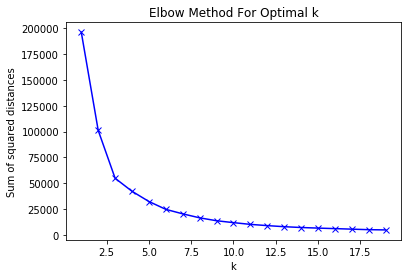

In [45]:
ddd = datasets[2][0]
print(datasets[2][1])
print("Elbow for K-means")
sqDistSum = list()
for k in range(1, 20):
    cluster = KMeans(n_clusters=k).fit(ddd[list(ddd)[:-1]])
    sqDistSum.append(cluster.inertia_)
plt.plot(range(1, 20), sqDistSum, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

2d-10c
average linkage


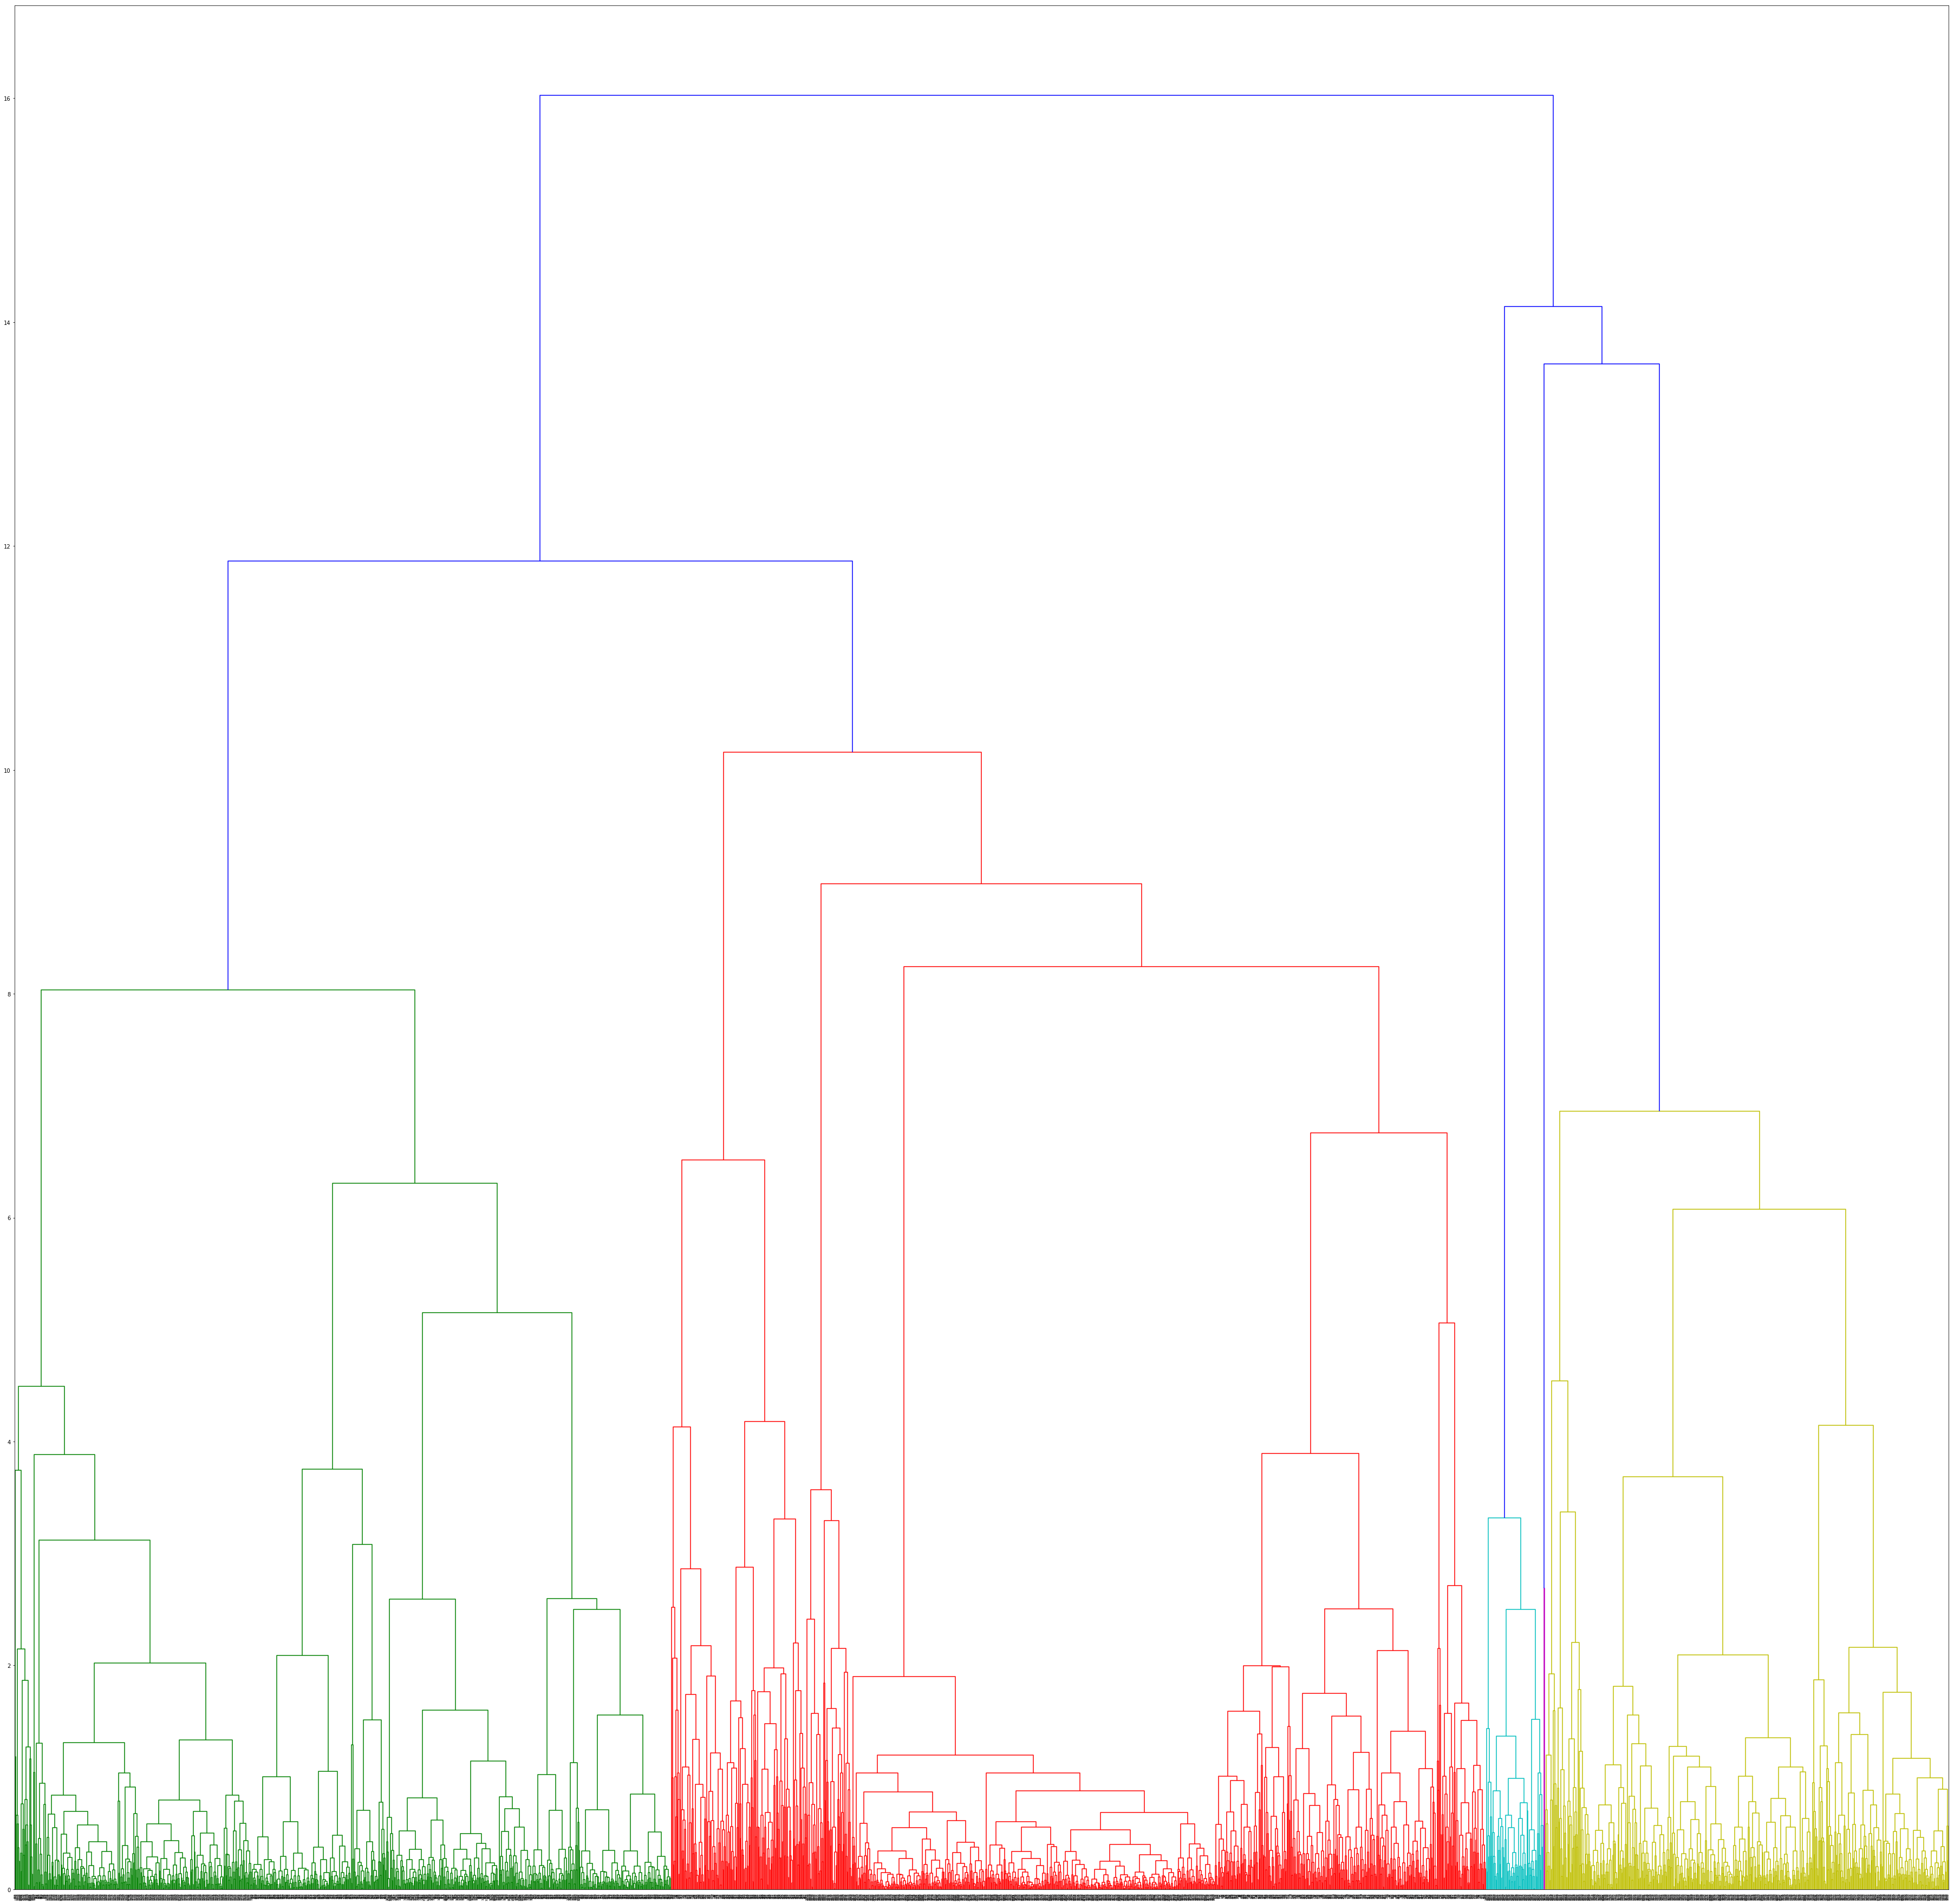

In [70]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

ddd = datasets[2][0]
print(datasets[2][1])
print("average linkage")

linked = linkage(ddd, 'average')
labelList = range(1, ddd.label.values.size + 1)
plt.figure(figsize=(2 ** 6, 2 ** 6))  
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=False)
plt.show()  

2d-10c
average linkage


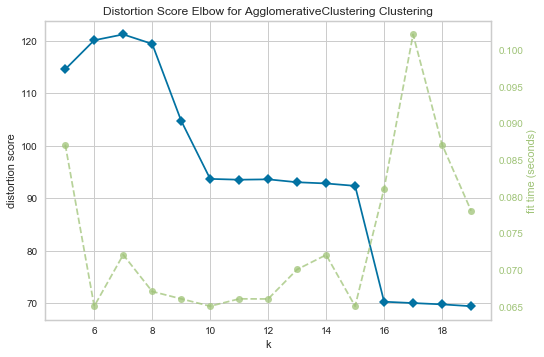

In [75]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

ddd = datasets[2][0]
print(datasets[2][1])
print("single linkage")
model = AgglomerativeClustering(affinity='euclidean', linkage='single')
visualizer = KElbowVisualizer(model, k=(,20))
visualizer.fit(ddd)
visualizer.poof()  

2d-10c
k-means sillhouete Width


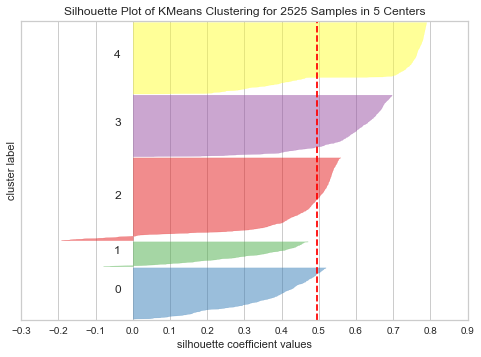

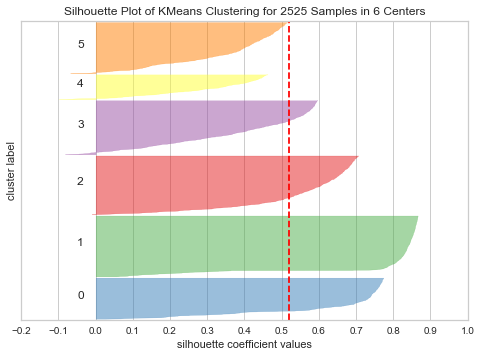

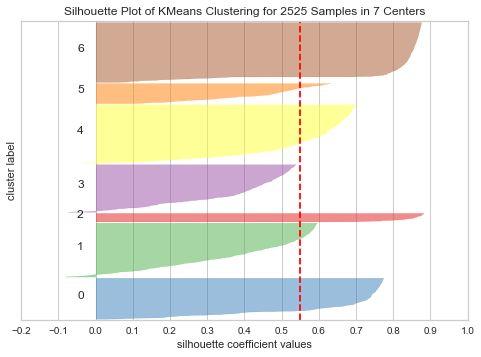

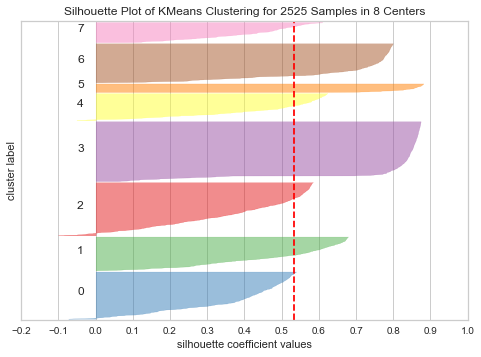

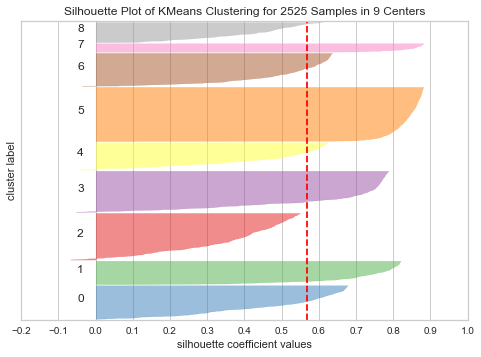

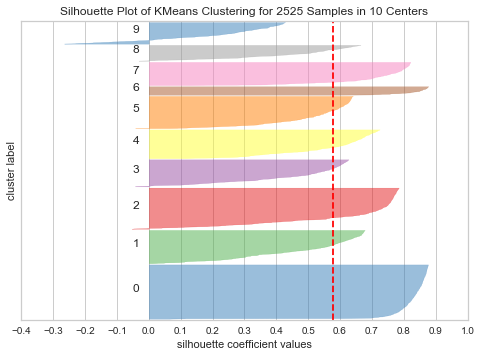

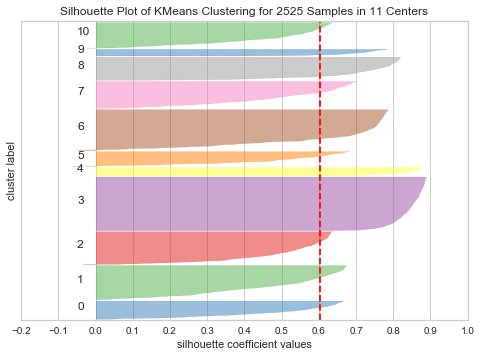

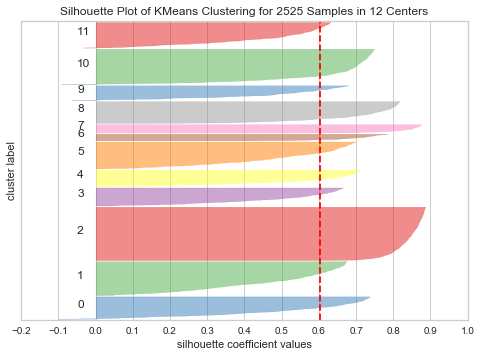

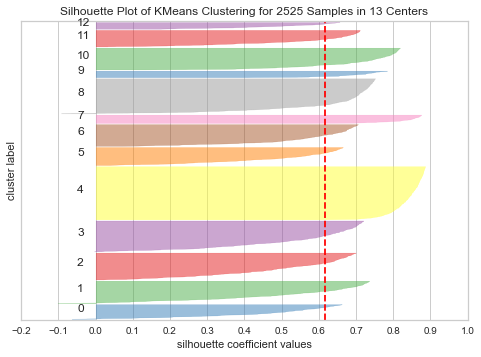

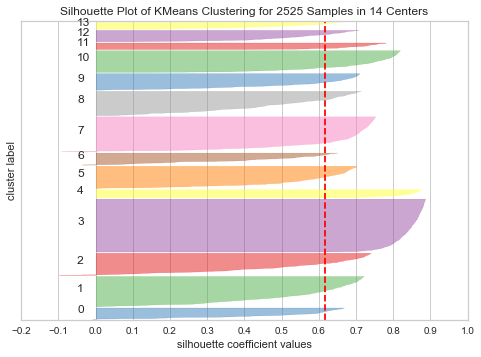

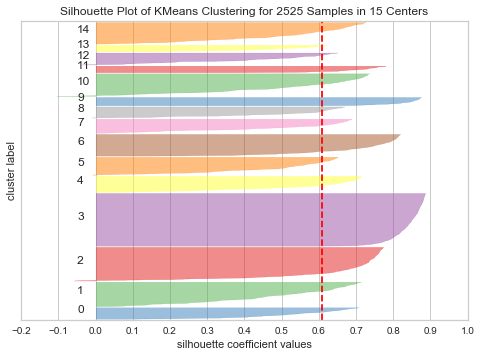

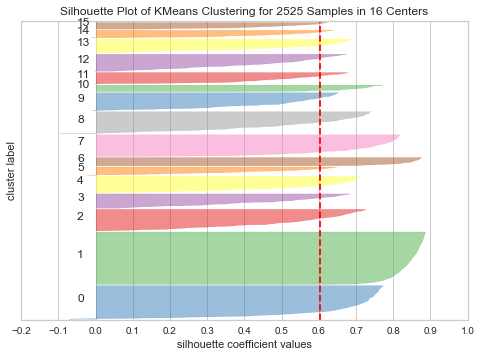

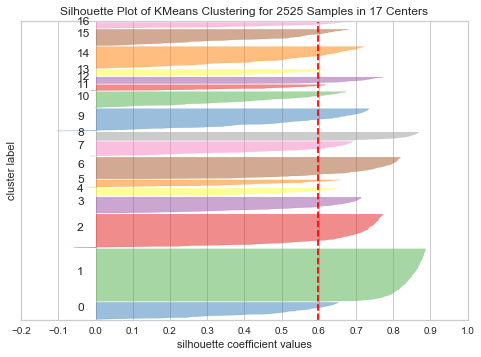

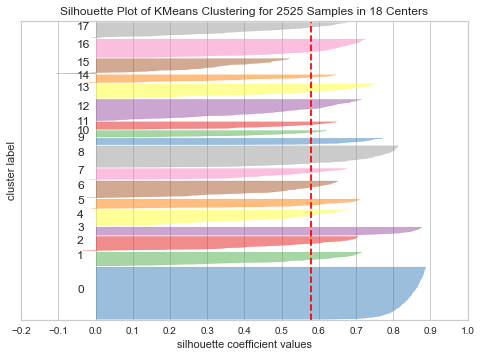

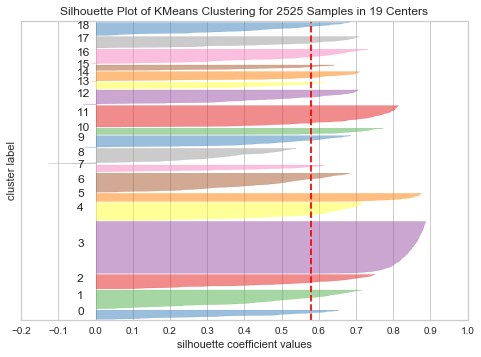

In [78]:
from yellowbrick.cluster import SilhouetteVisualizer

ddd = datasets[2][0]
print(datasets[2][1])
print("k-means sillhouete Width")
for k in range(5, 20):
    cluster = KMeans(k)
    visualizer = SilhouetteVisualizer(cluster)
    visualizer.fit(ddd)
    visualizer.poof()

In [13]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.mixture import GaussianMixture


def single_link(data):
    cluster = AgglomerativeClustering(n_clusters=len(set(data.label)), affinity='euclidean', linkage='single')
    cluster.fit_predict(data[list(data)[:-1]])
    return cluster.labels_
    
def complete_link(data):
    cluster = AgglomerativeClustering(n_clusters=len(set(data.label)), affinity='euclidean', linkage='complete')
    cluster.fit_predict(data[list(data)[:-1]])
    return cluster.labels_
    
def average_link(data):
    cluster = AgglomerativeClustering(n_clusters=len(set(data.label)), affinity='euclidean', linkage='average')
    cluster.fit_predict(data[list(data)[:-1]])
    return cluster.labels_
    
def ward_link(data):
    cluster = AgglomerativeClustering(n_clusters=len(set(data.label)), affinity='euclidean', linkage='ward')
    cluster.fit_predict(data[list(data)[:-1]])
    return cluster.labels_
    
def em_clust(data):
    return GaussianMixture(n_components=len(set(data.label))).fit_predict(data[list(data)[:-1]])

def plot_with_error(x, y, y_hat, ax):
    ari = adjusted_rand_score(y, y_hat)
    ax.scatter(x[:, 0], x[:, 1], c = y_hat, cmap='rainbow')
    return (1 - ari) / 2, ari

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!


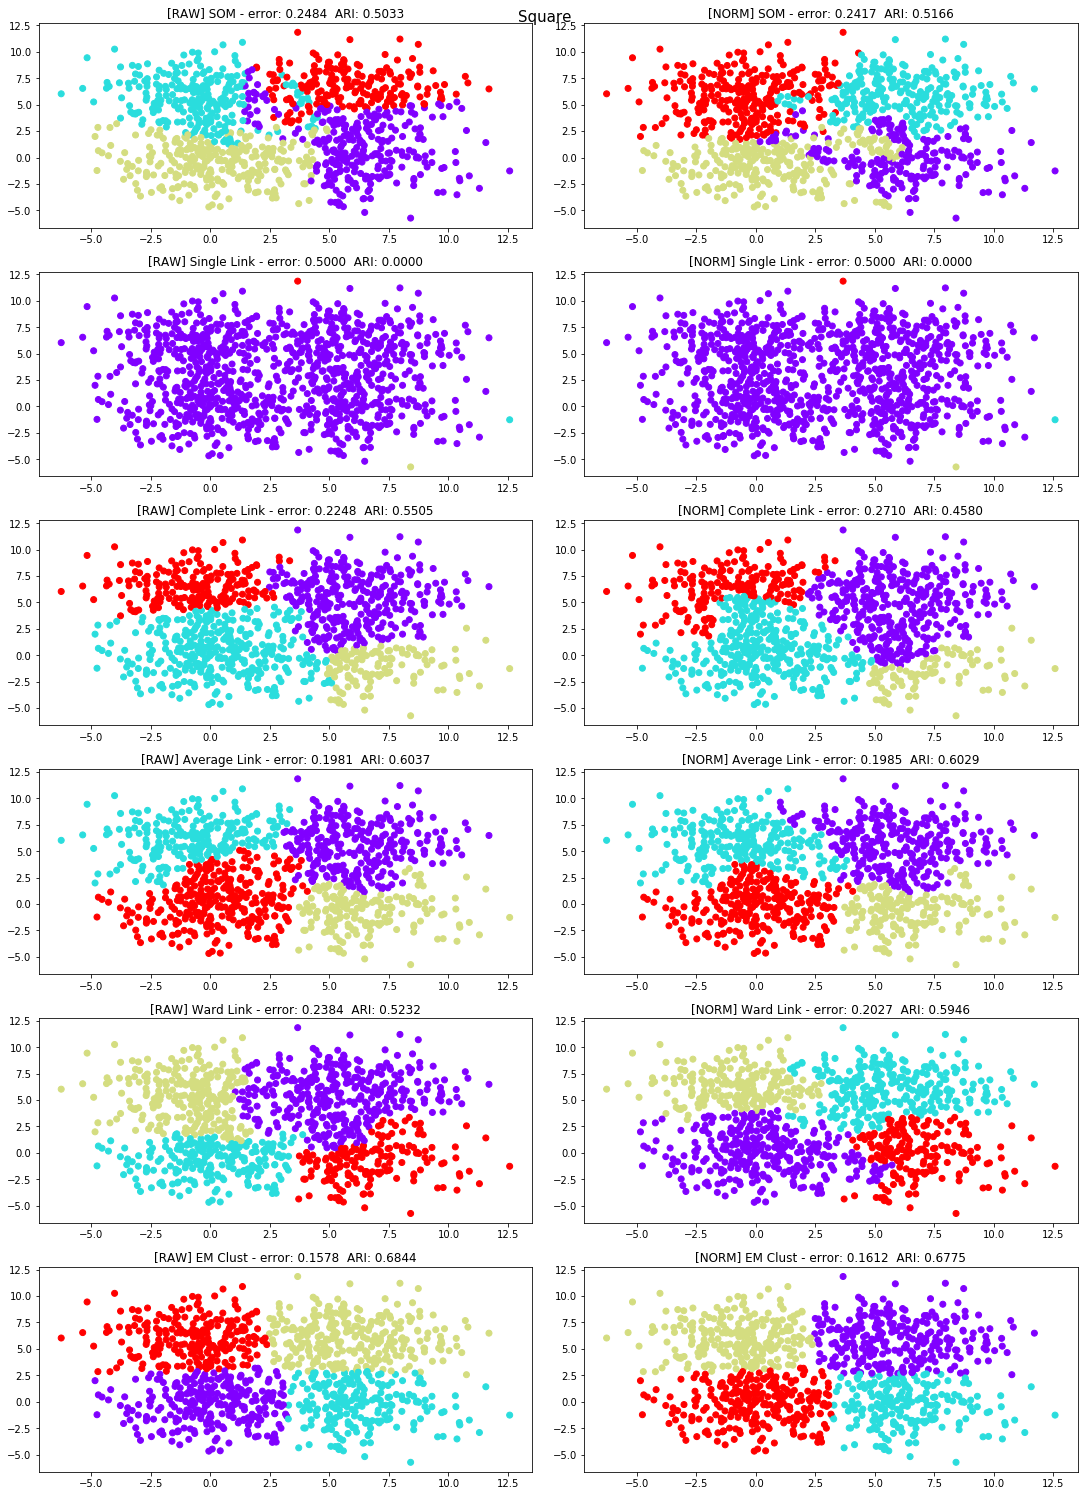

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!


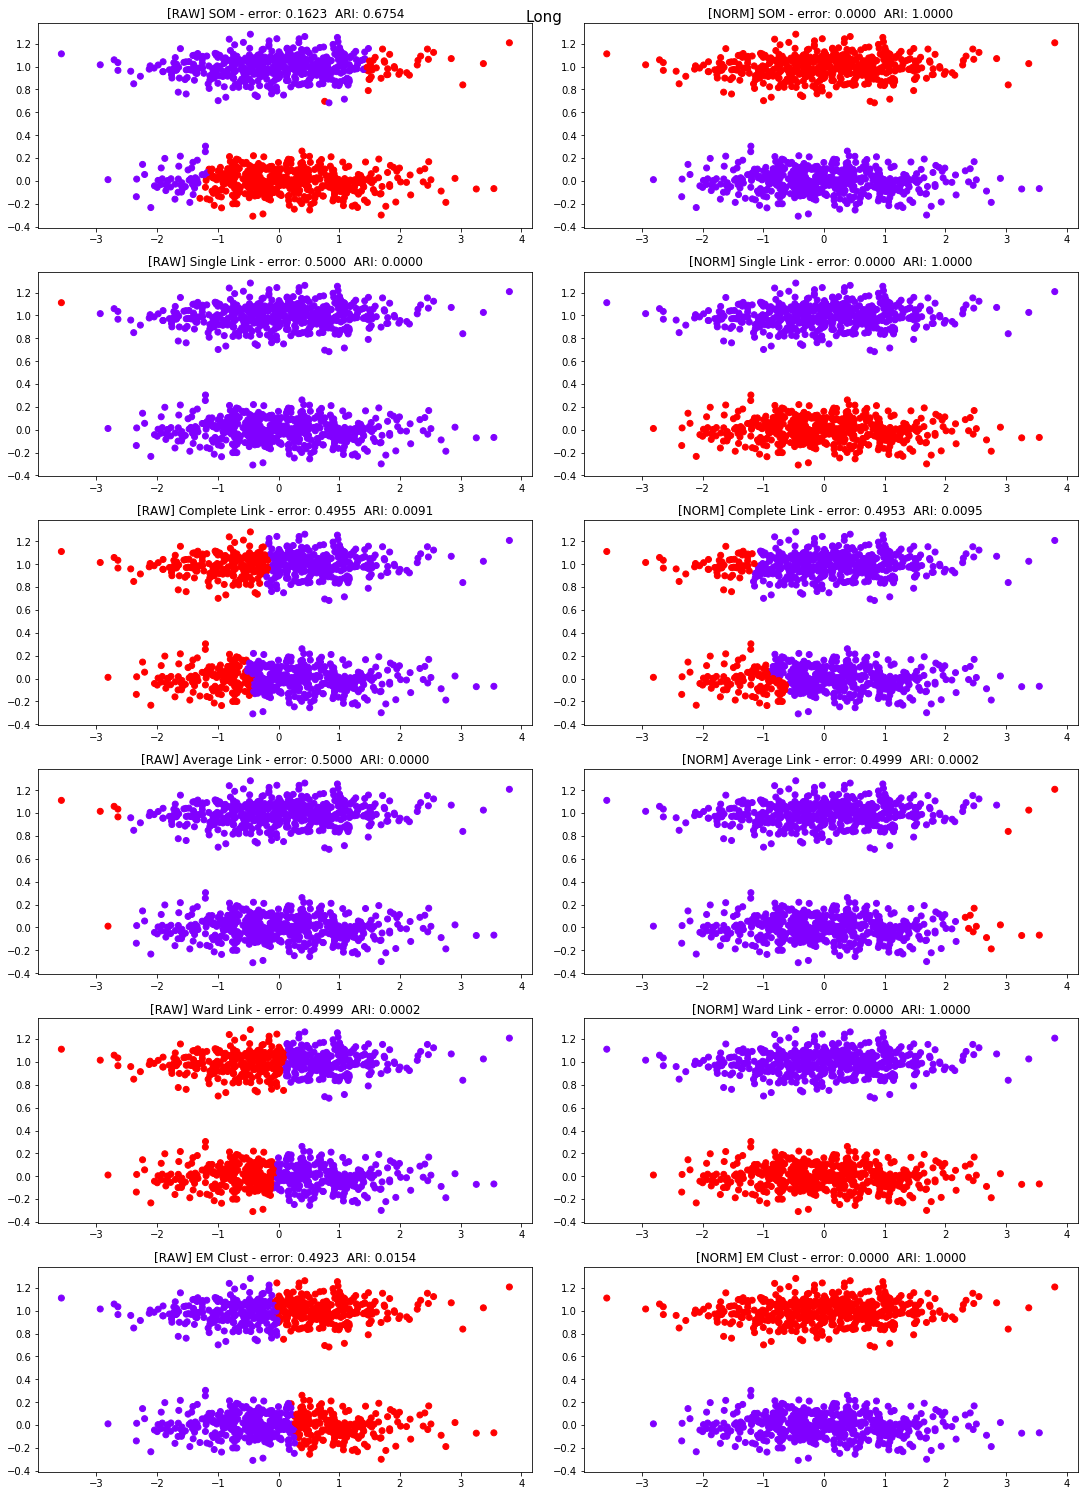

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!


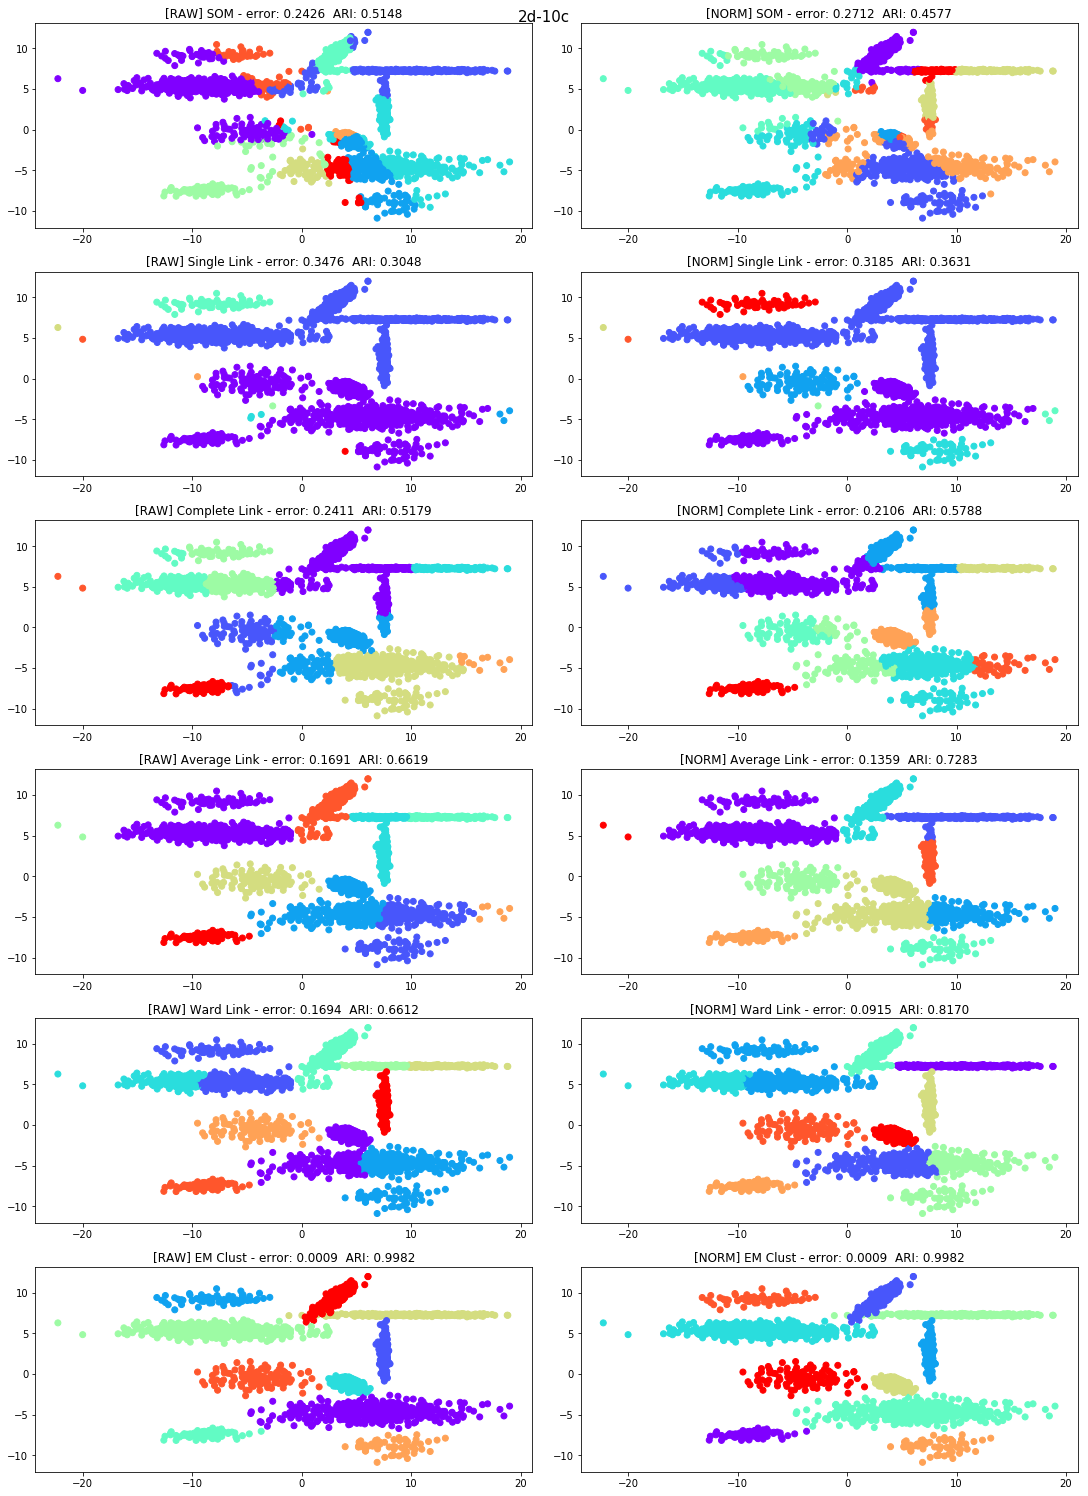

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!


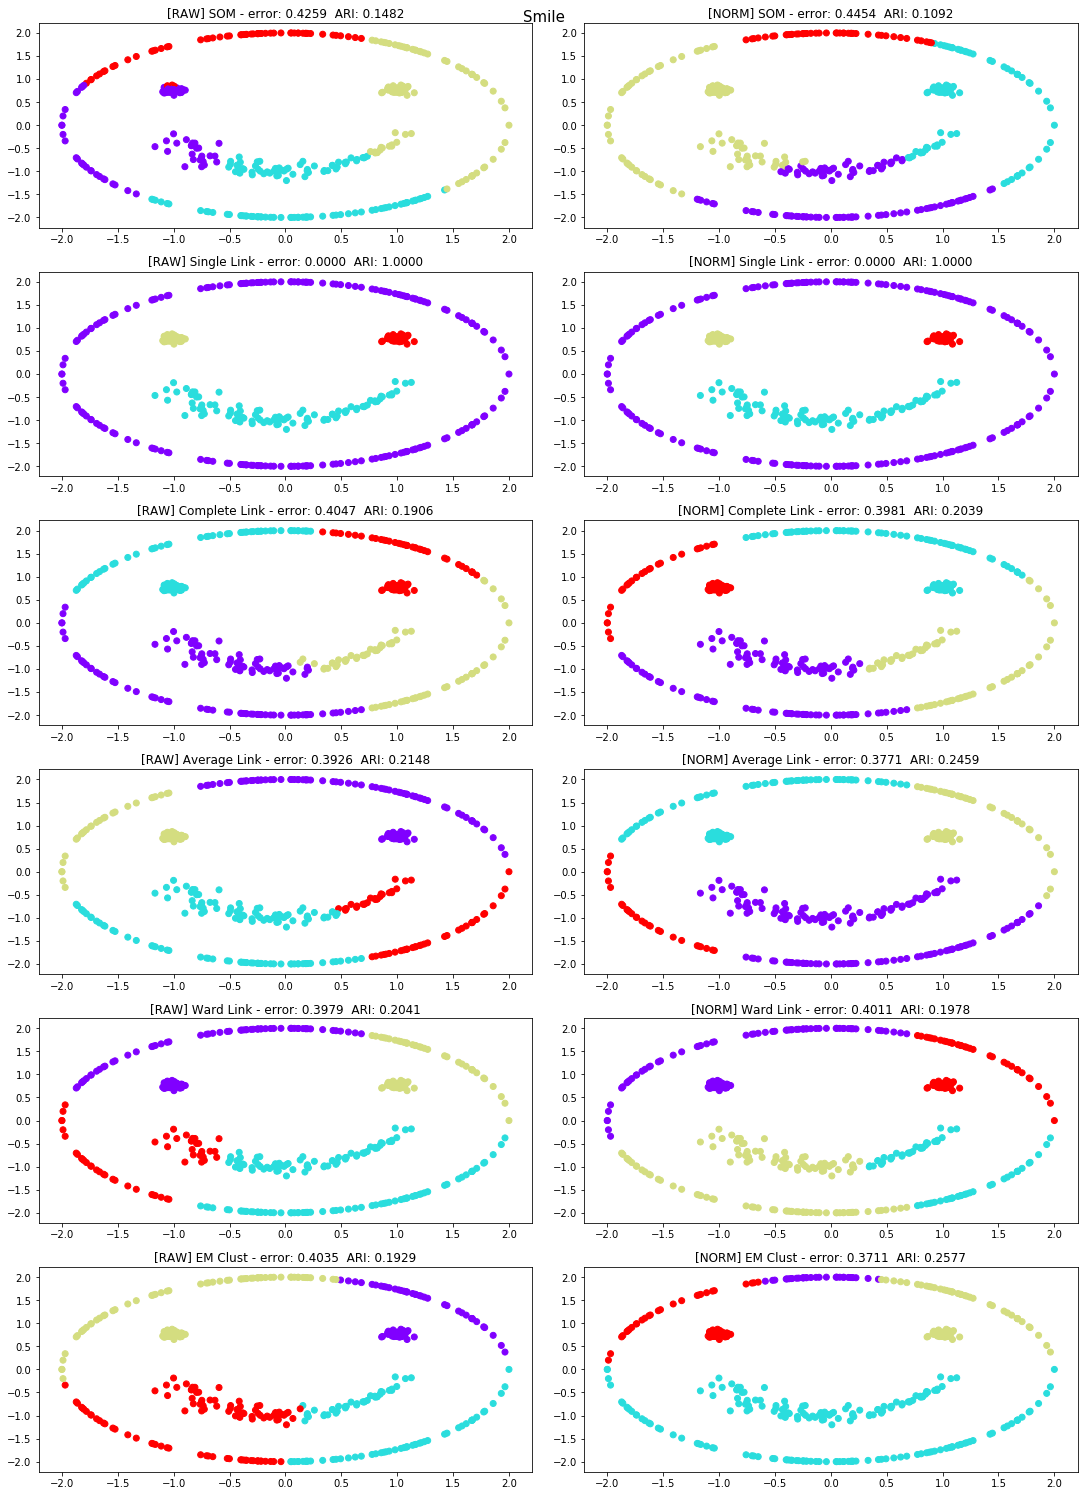

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!


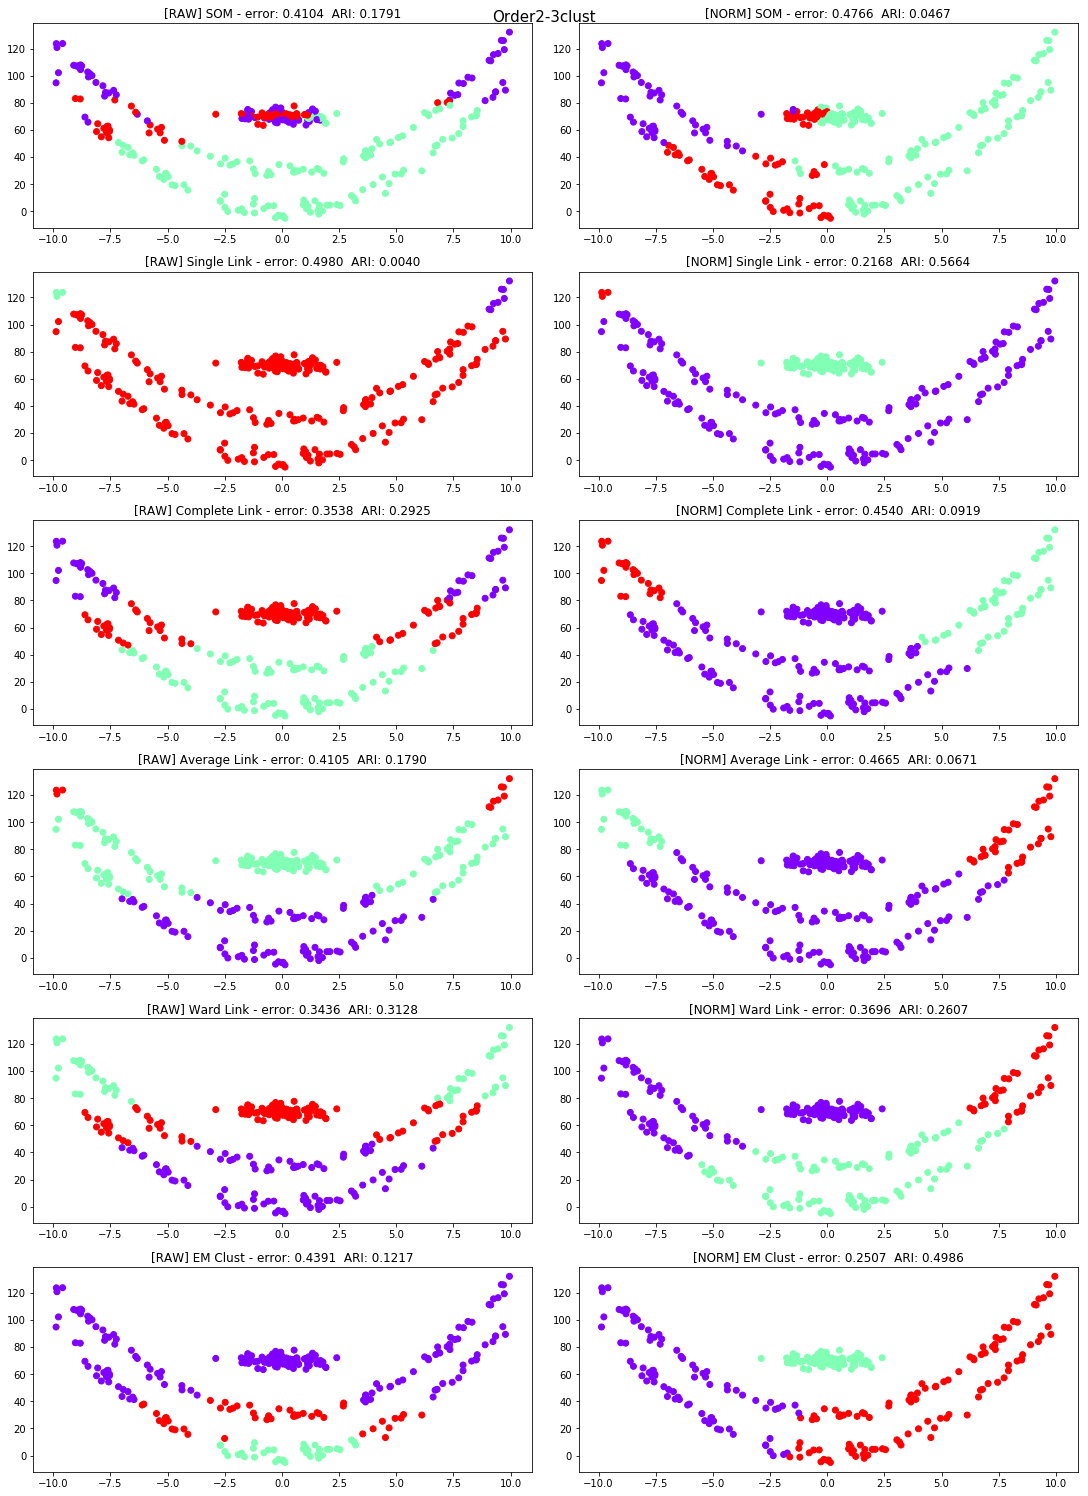

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!


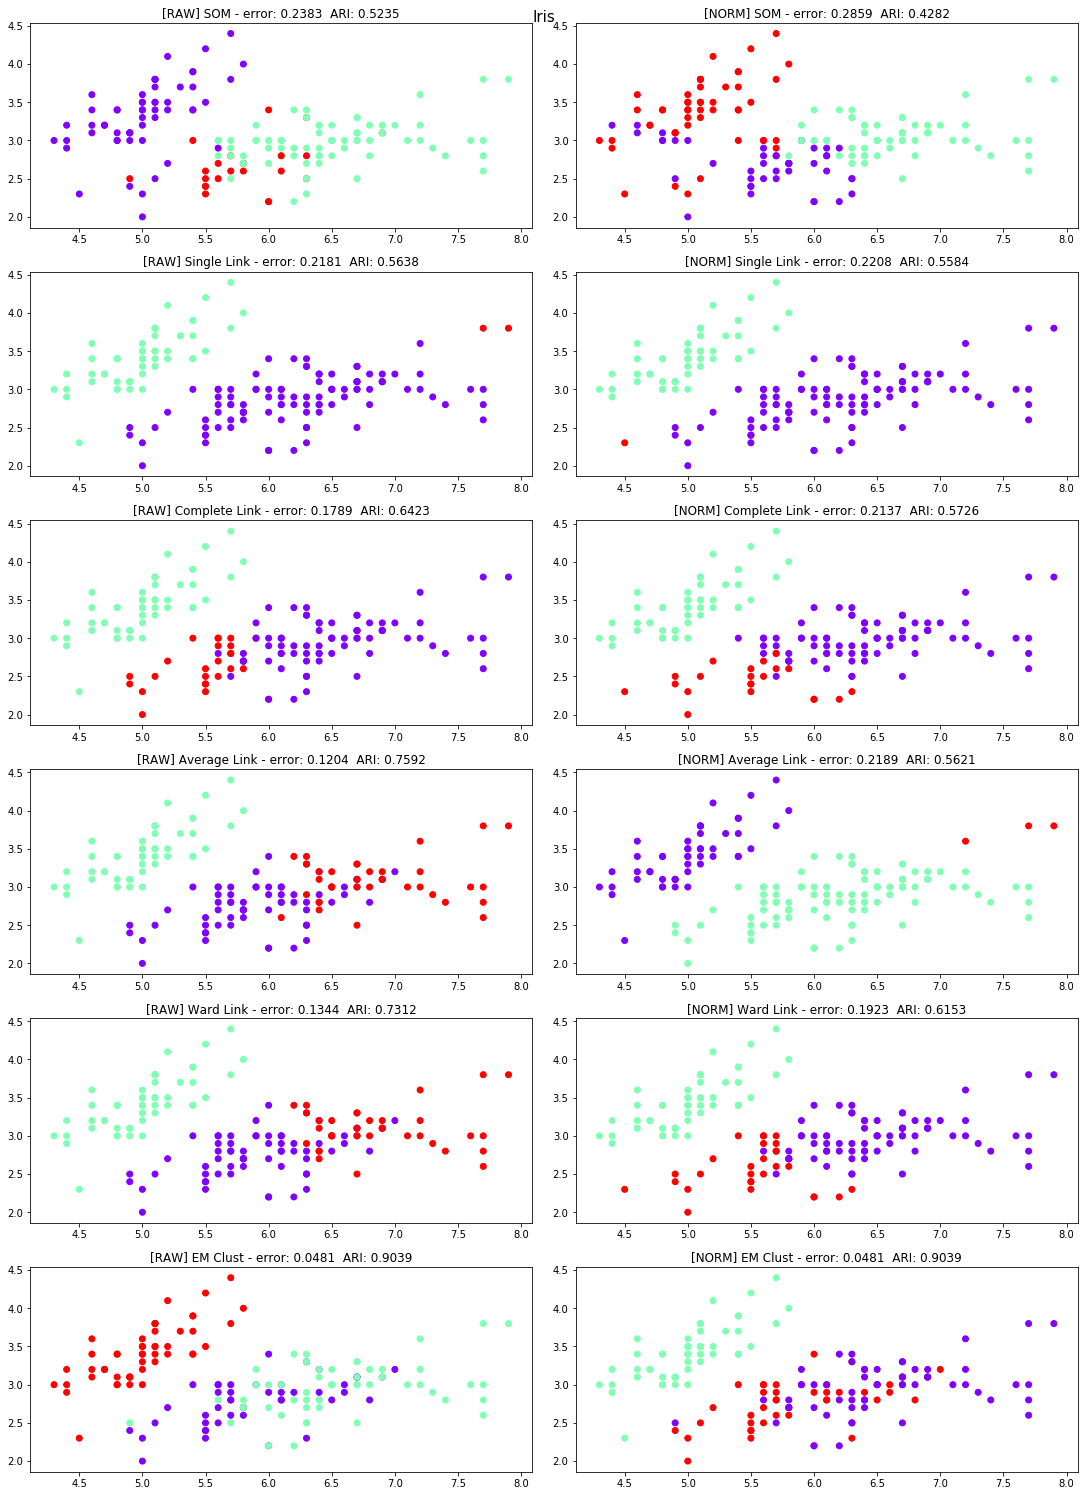

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

algs = [
        (SOM_clustering, "SOM"),
        (single_link, "Single Link"),
        (complete_link, "Complete Link"),
        (average_link, "Average Link"),
        (ward_link, "Ward Link"),
        (em_clust, "EM Clust")
    ]

def display(algs, data, dataset_name):
    fig, axs = plt.subplots(len(algs), 2, constrained_layout=True, figsize=(15, 21))
    fig.suptitle(dataset_name, fontsize=15)
    for idx, (alg, name) in enumerate(algs):
        labels_for_raw = alg(data)
        np_data = data.values
        raw_err = plot_with_error(np_data[:, :2], data.label, labels_for_raw, axs.flatten()[2 * idx])
        axs.flatten()[2 * idx].title.set_text("[RAW] %s - error: %.4f  ARI: %.4f" % (name, *raw_err))
        
        norm_data = np_data.copy()
        norm_data[:, :-1] = (np_data[:, :-1] - np.mean(np_data[:, :-1], axis=0)) / np.std(np_data[:, :-1], axis=0)
        labels_for_norm = alg(pd.DataFrame(norm_data, columns=data.columns))
        norm_err = plot_with_error(np_data[:, :2], data.label, labels_for_norm, axs.flatten()[2 * idx + 1])
        axs.flatten()[2 * idx + 1].title.set_text("[NORM] %s - error: %.4f  ARI: %.4f" % (name, *norm_err))

    plt.show()

for data, name in datasets:
    display(algs, data, name)
